In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mlxtend.plotting import plot_decision_regions 
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
diabetes_df = pd.read_csv('data/Healthcare-Diabetes.csv')

In [6]:
diabetes_df.head()  

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
diabetes_df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [9]:
diabetes_df.describe()

Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.102601      69.134393      20.824422   
std     799.197097     3.323801    32.036508      19.231438      16.059596   
min       1.000000     0.000000     0.000000       0.000000       0.000000   
25%     692.750000     1.000000    99.000000      62.000000       0.000000   
50%    1384.500000     3.000000   117.000000      72.000000      23.000000   
75%    2076.250000     6.000000   141.000000      80.000000      32.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2768.000000  2768.000000               2768.000000  2768.000000   
mean     80.127890    32.137392                  0.471193    33.132225   
std     112.301933     8.076127                  0.325669    11.777230   
min       0.000000     0.000000                  0.078000    21.000000   
25%       0.000000    27.300000                  0.244000    24.000000   
50%      37.000000    32.200000                  0.375000    29.000000   
75%     130.000000    36.625000                  0.624000    40.000000   
max     846.000000    80.600000                  2.420000    81.000000   

           Outcome  
count  2768.000000  
mean      0.343931  
std       0.475104  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [10]:
diabetes_df.describe().T

count         mean         std     min      25%  \
Id                        2768.0  1384.500000  799.197097   1.000  692.750   
Pregnancies               2768.0     3.742775    3.323801   0.000    1.000   
Glucose                   2768.0   121.102601   32.036508   0.000   99.000   
BloodPressure             2768.0    69.134393   19.231438   0.000   62.000   
SkinThickness             2768.0    20.824422   16.059596   0.000    0.000   
Insulin                   2768.0    80.127890  112.301933   0.000    0.000   
BMI                       2768.0    32.137392    8.076127   0.000   27.300   
DiabetesPedigreeFunction  2768.0     0.471193    0.325669   0.078    0.244   
Age                       2768.0    33.132225   11.777230  21.000   24.000   
Outcome                   2768.0     0.343931    0.475104   0.000    0.000   

                               50%       75%      max  
Id                        1384.500  2076.250  2768.00  
Pregnancies                  3.000     6.000    17.00  
Glucose                    117.000   141.000   199.00  
BloodPressure               72.000    80.000   122.00  
SkinThickness               23.000    32.000   110.00  
Insulin                     37.000   130.000   846.00  
BMI                         32.200    36.625    80.60  
DiabetesPedigreeFunction     0.375     0.624     2.42  
Age                         29.000    40.000    81.00  
Outcome                      0.000     1.000     1.00

In [11]:
diabetes_df.isnull()

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0     False        False    False          False          False    False   
1     False        False    False          False          False    False   
2     False        False    False          False          False    False   
3     False        False    False          False          False    False   
4     False        False    False          False          False    False   
...     ...          ...      ...            ...            ...      ...   
2763  False        False    False          False          False    False   
2764  False        False    False          False          False    False   
2765  False        False    False          False          False    False   
2766  False        False    False          False          False    False   
2767  False        False    False          False          False    False   

        BMI  DiabetesPedigreeFunction    Age  Outcome  
0     False                     False  False    False  
1     False                     False  False    False  
2     False                     False  False    False  
3     False                     False  False    False  
4     False                     False  False    False  
...     ...                       ...    ...      ...  
2763  False                     False  False    False  
2764  False                     False  False    False  
2765  False                     False  False    False  
2766  False                     False  False    False  
2767  False                     False  False    False  

[2768 rows x 10 columns]

In [12]:
diabetes_df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
print(diabetes_df_copy.isnull().sum())

Id                             0
Pregnancies                    0
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64


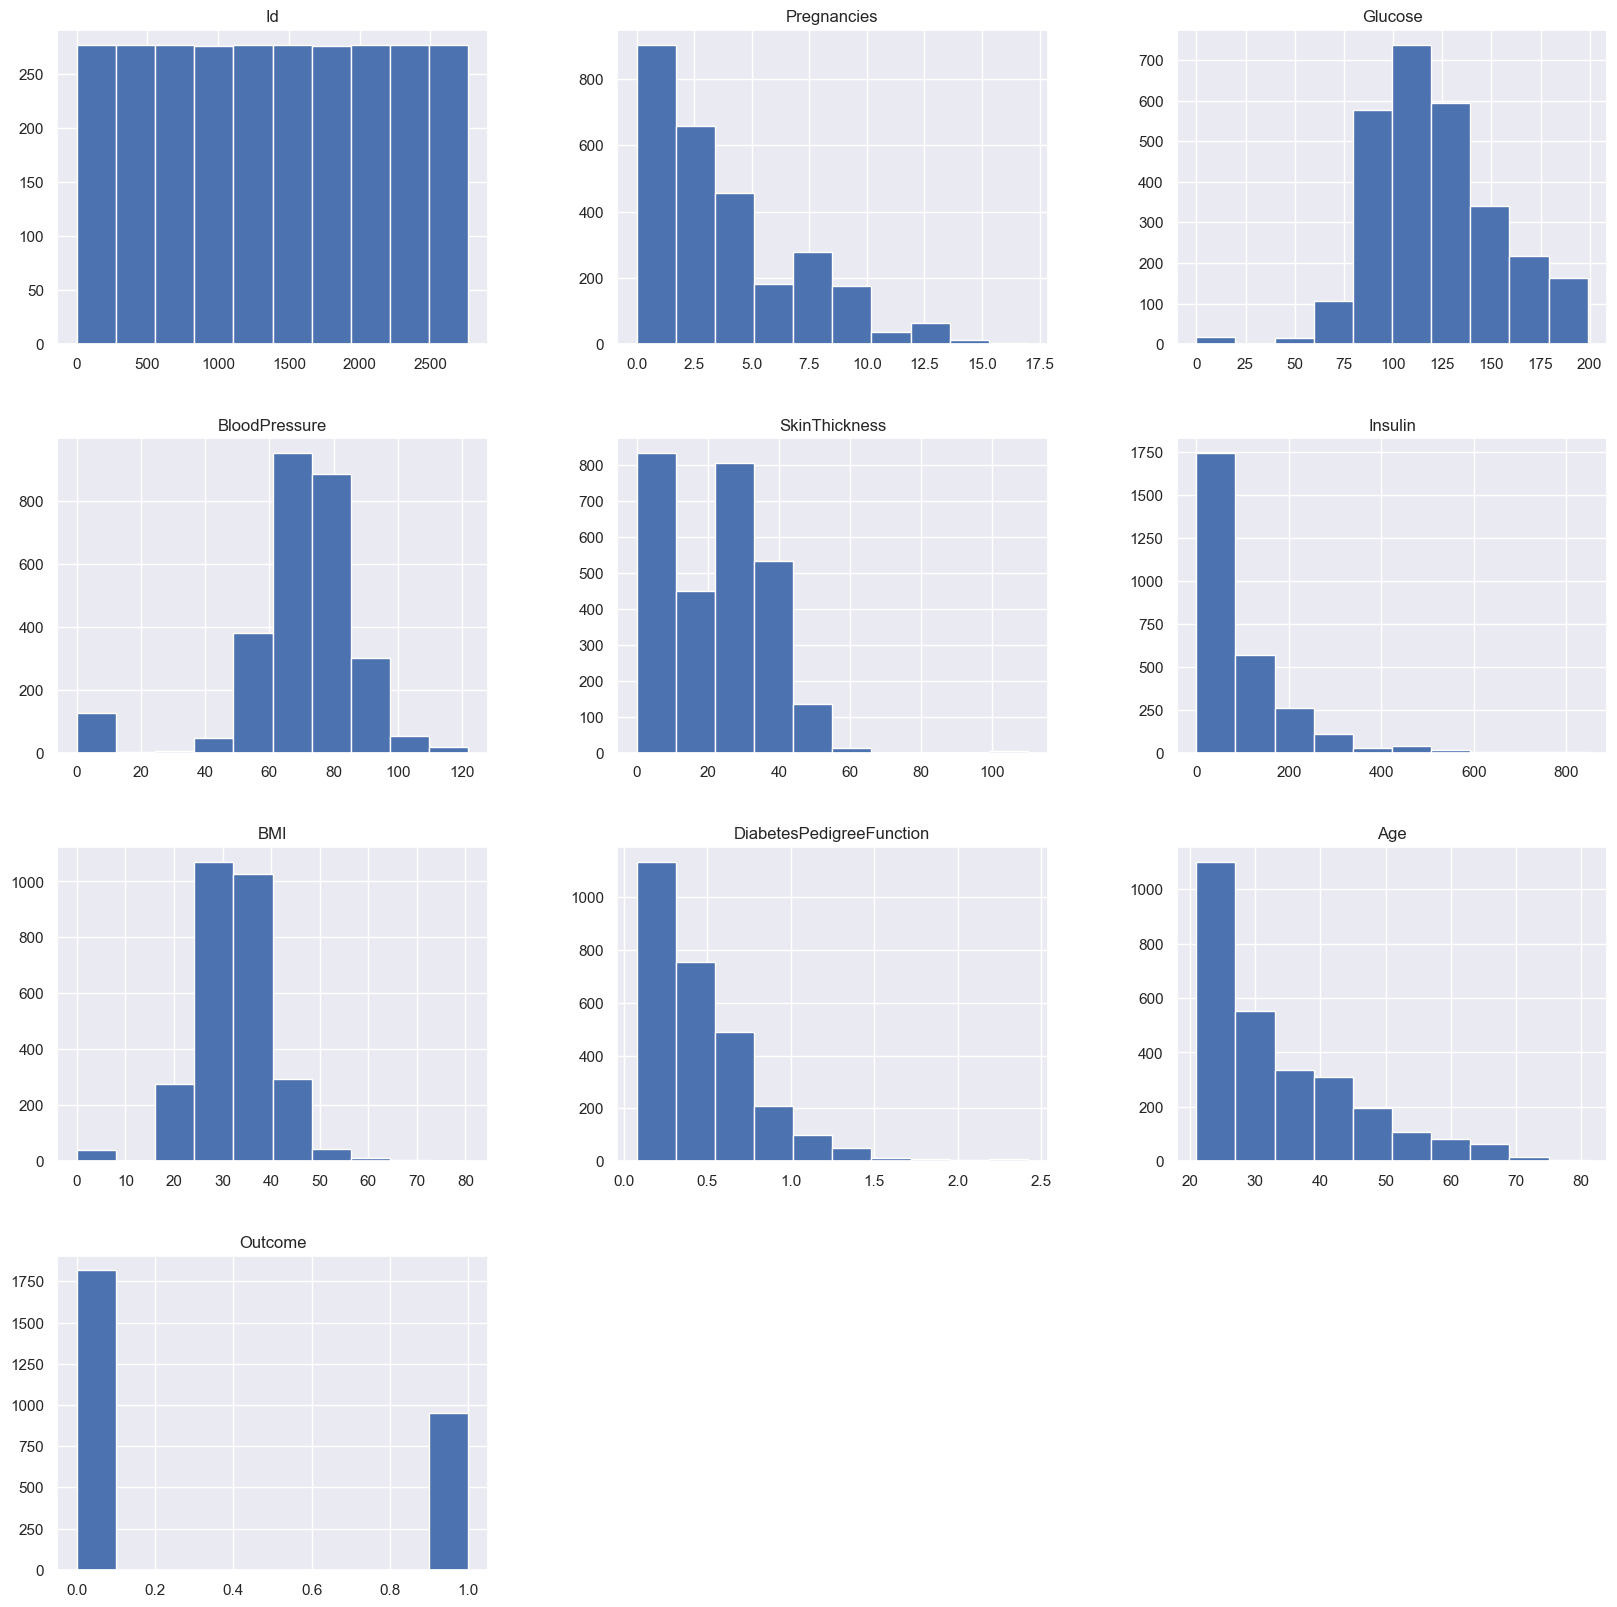

In [14]:
p = diabetes_df.hist(figsize = (20, 20))

In [15]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

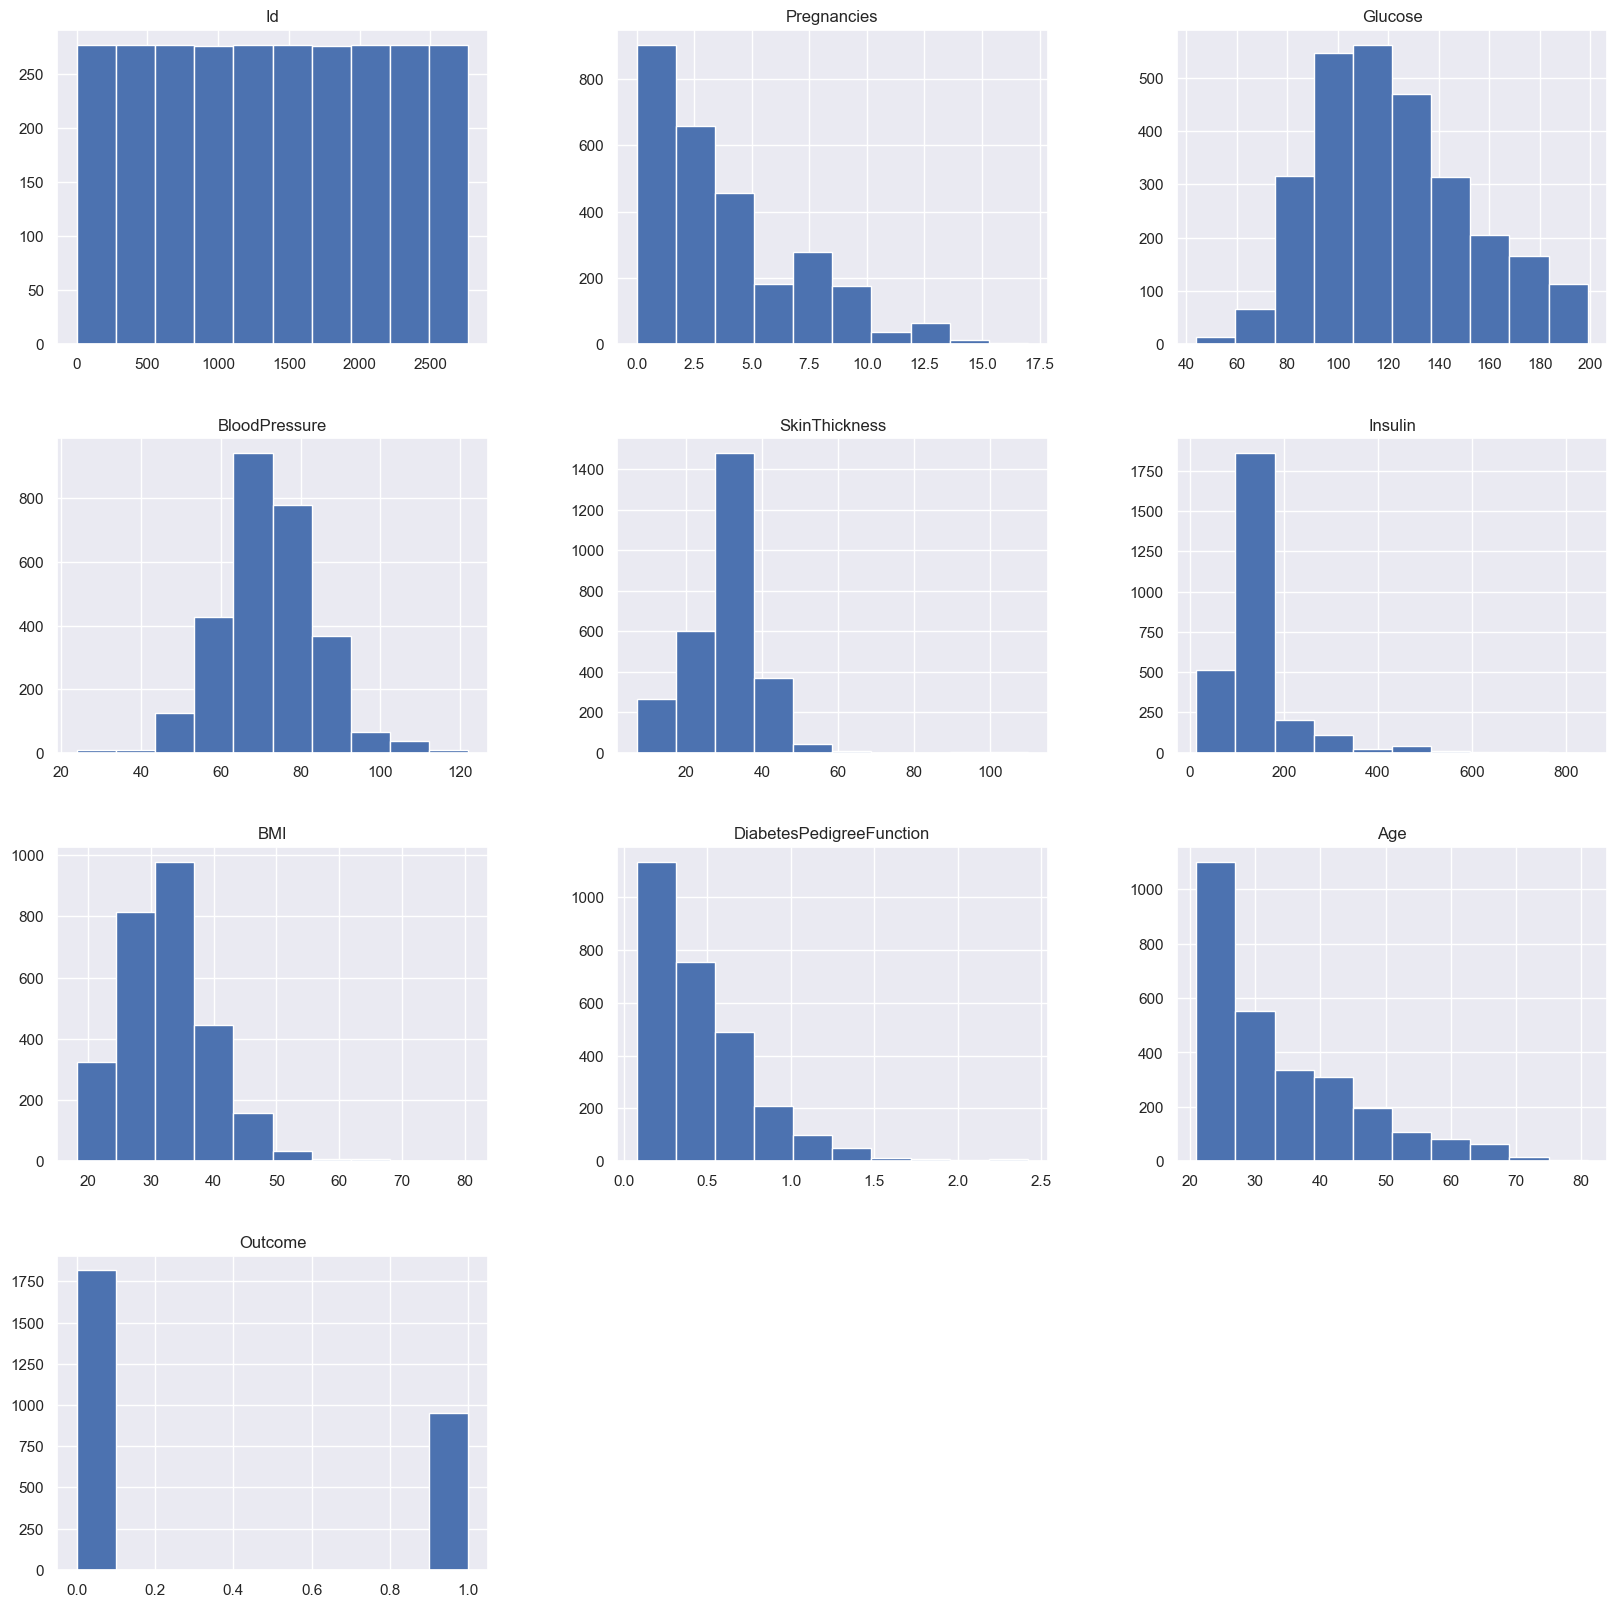

In [16]:
p = diabetes_df_copy.hist(figsize = (20, 20))

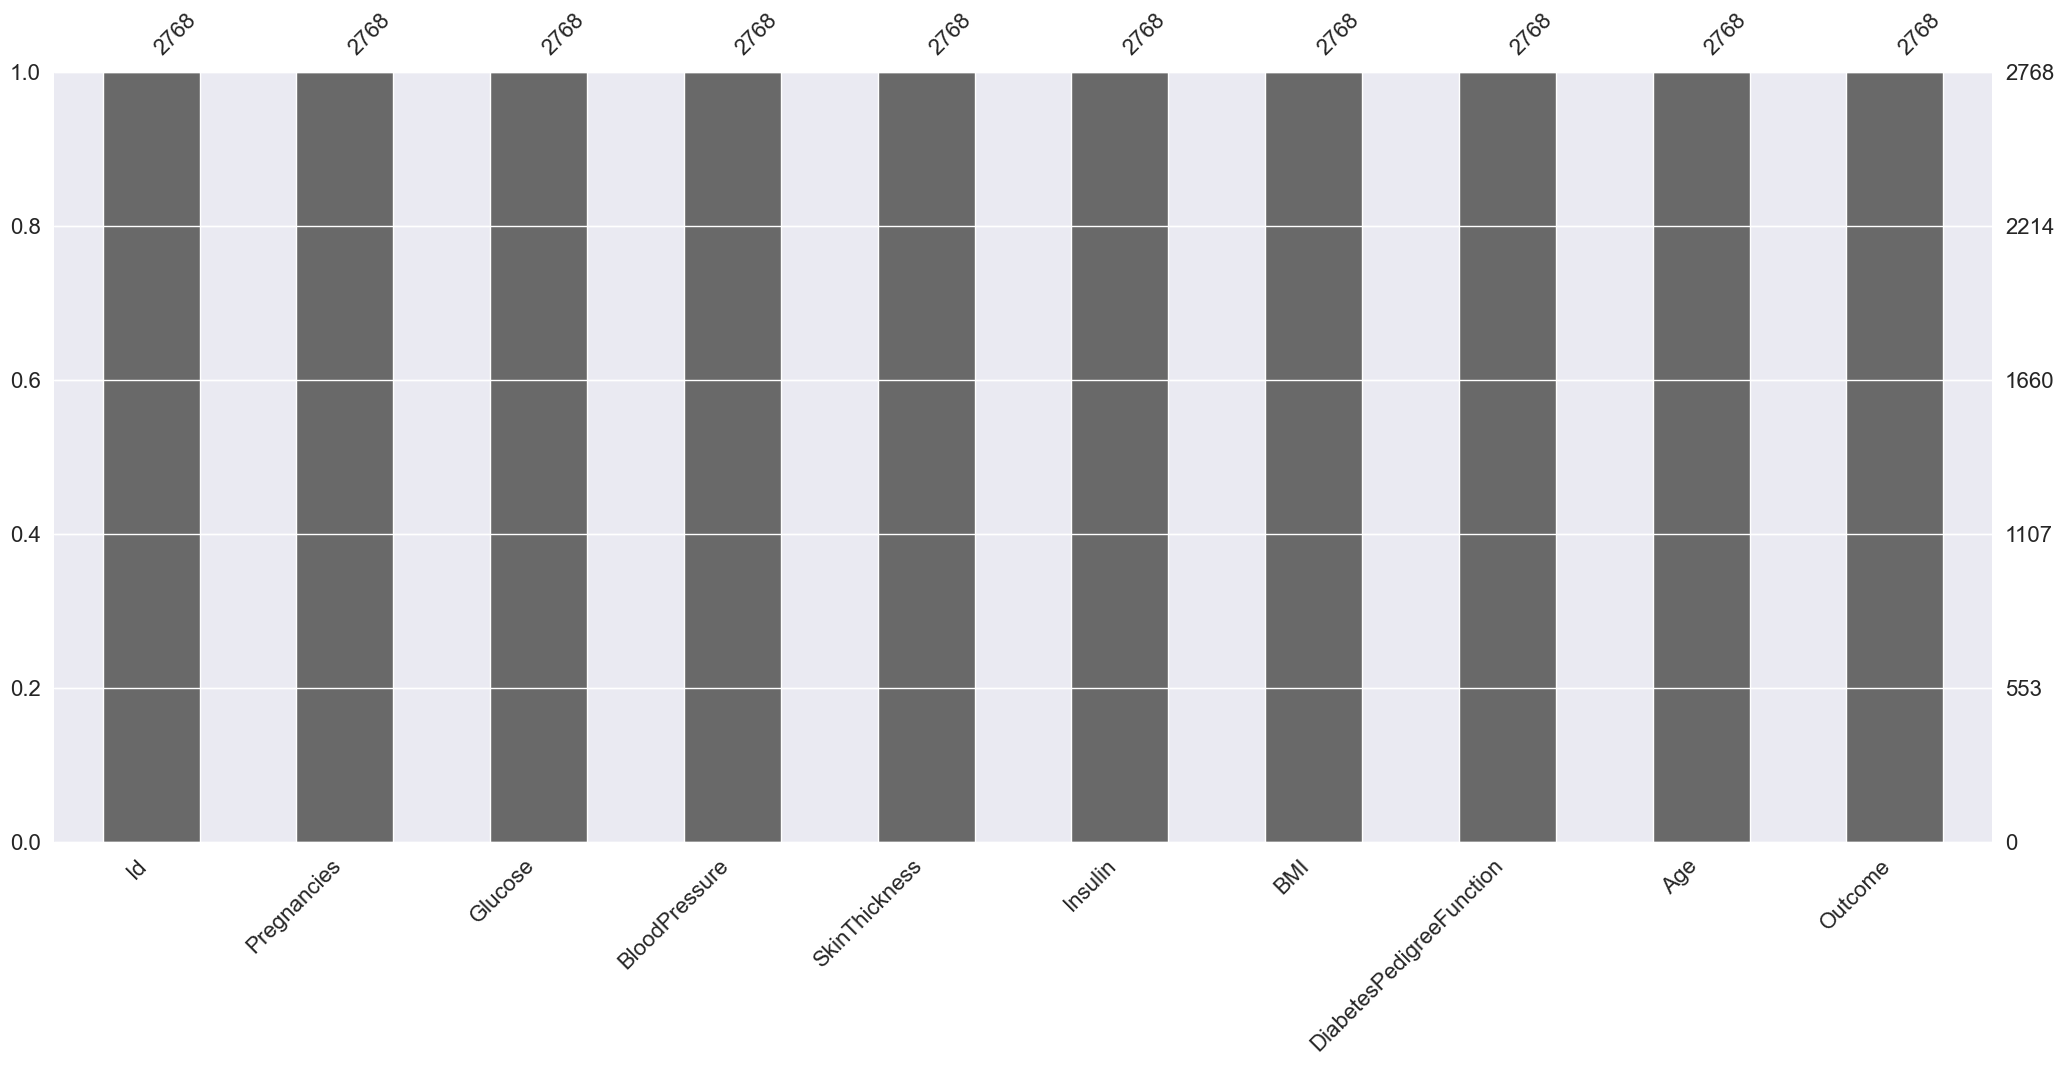

In [17]:
p = msno.bar(diabetes_df)

Outcome
0    1816
1     952
Name: count, dtype: int64


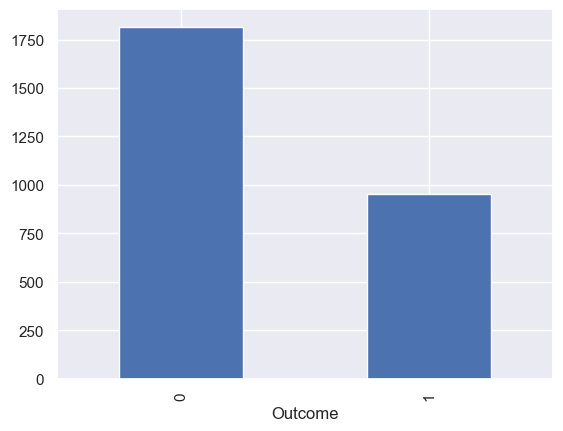

In [18]:
color_wheel = {1: "blue", 2: "red"}
color = diabetes_df_copy['Outcome'].map(lambda x : color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p = diabetes_df.Outcome.value_counts().plot(kind='bar')

We can see based on this graph that the number of people not diagnosed with diabetes is approximately double as the number of people diagnosed with diabetes

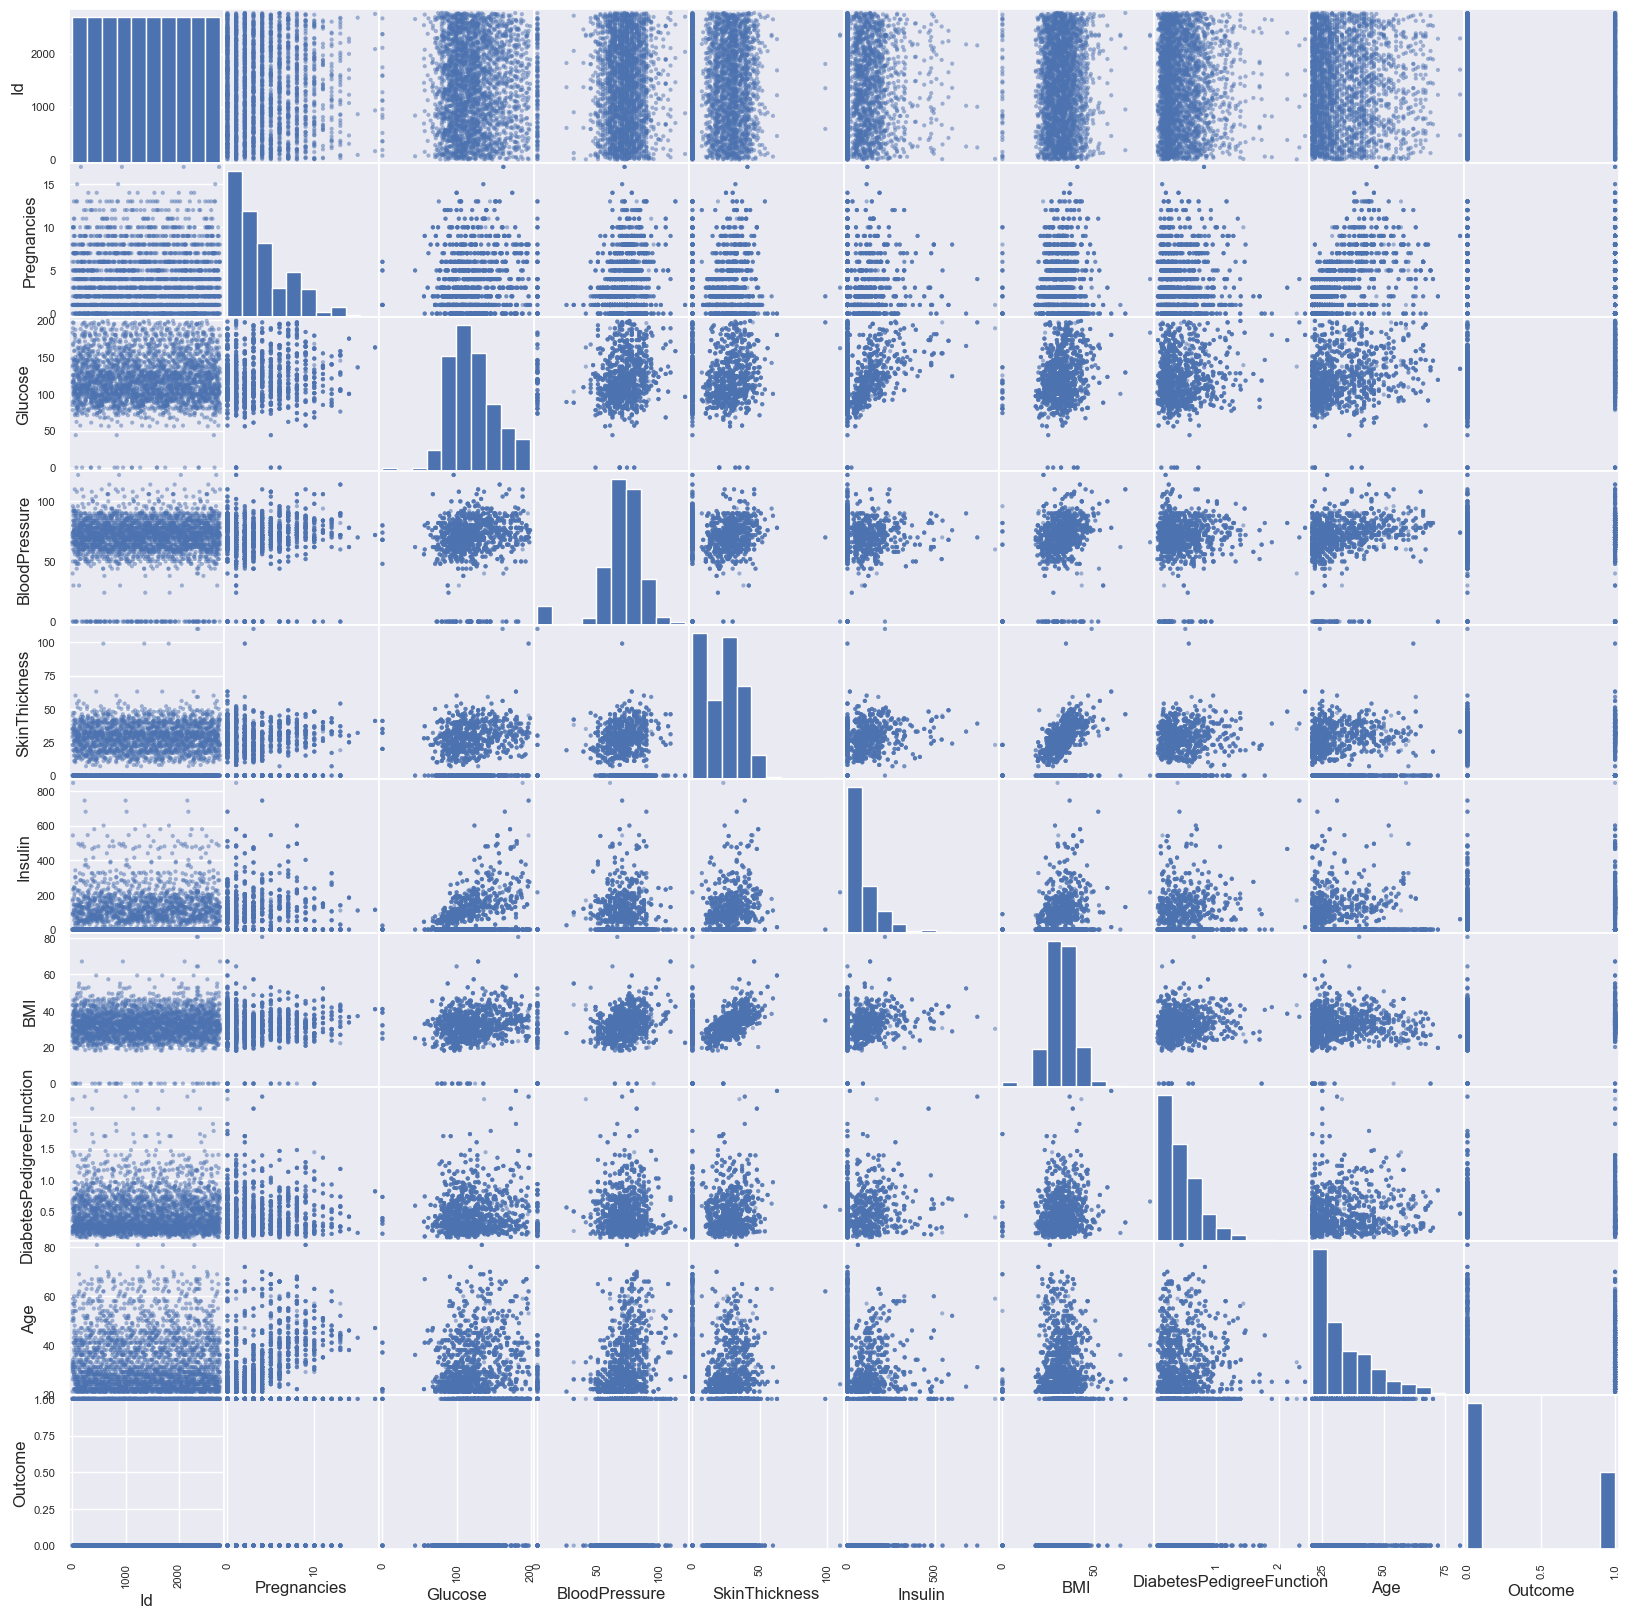

In [19]:
p = scatter_matrix(diabetes_df, figsize = (20, 20))

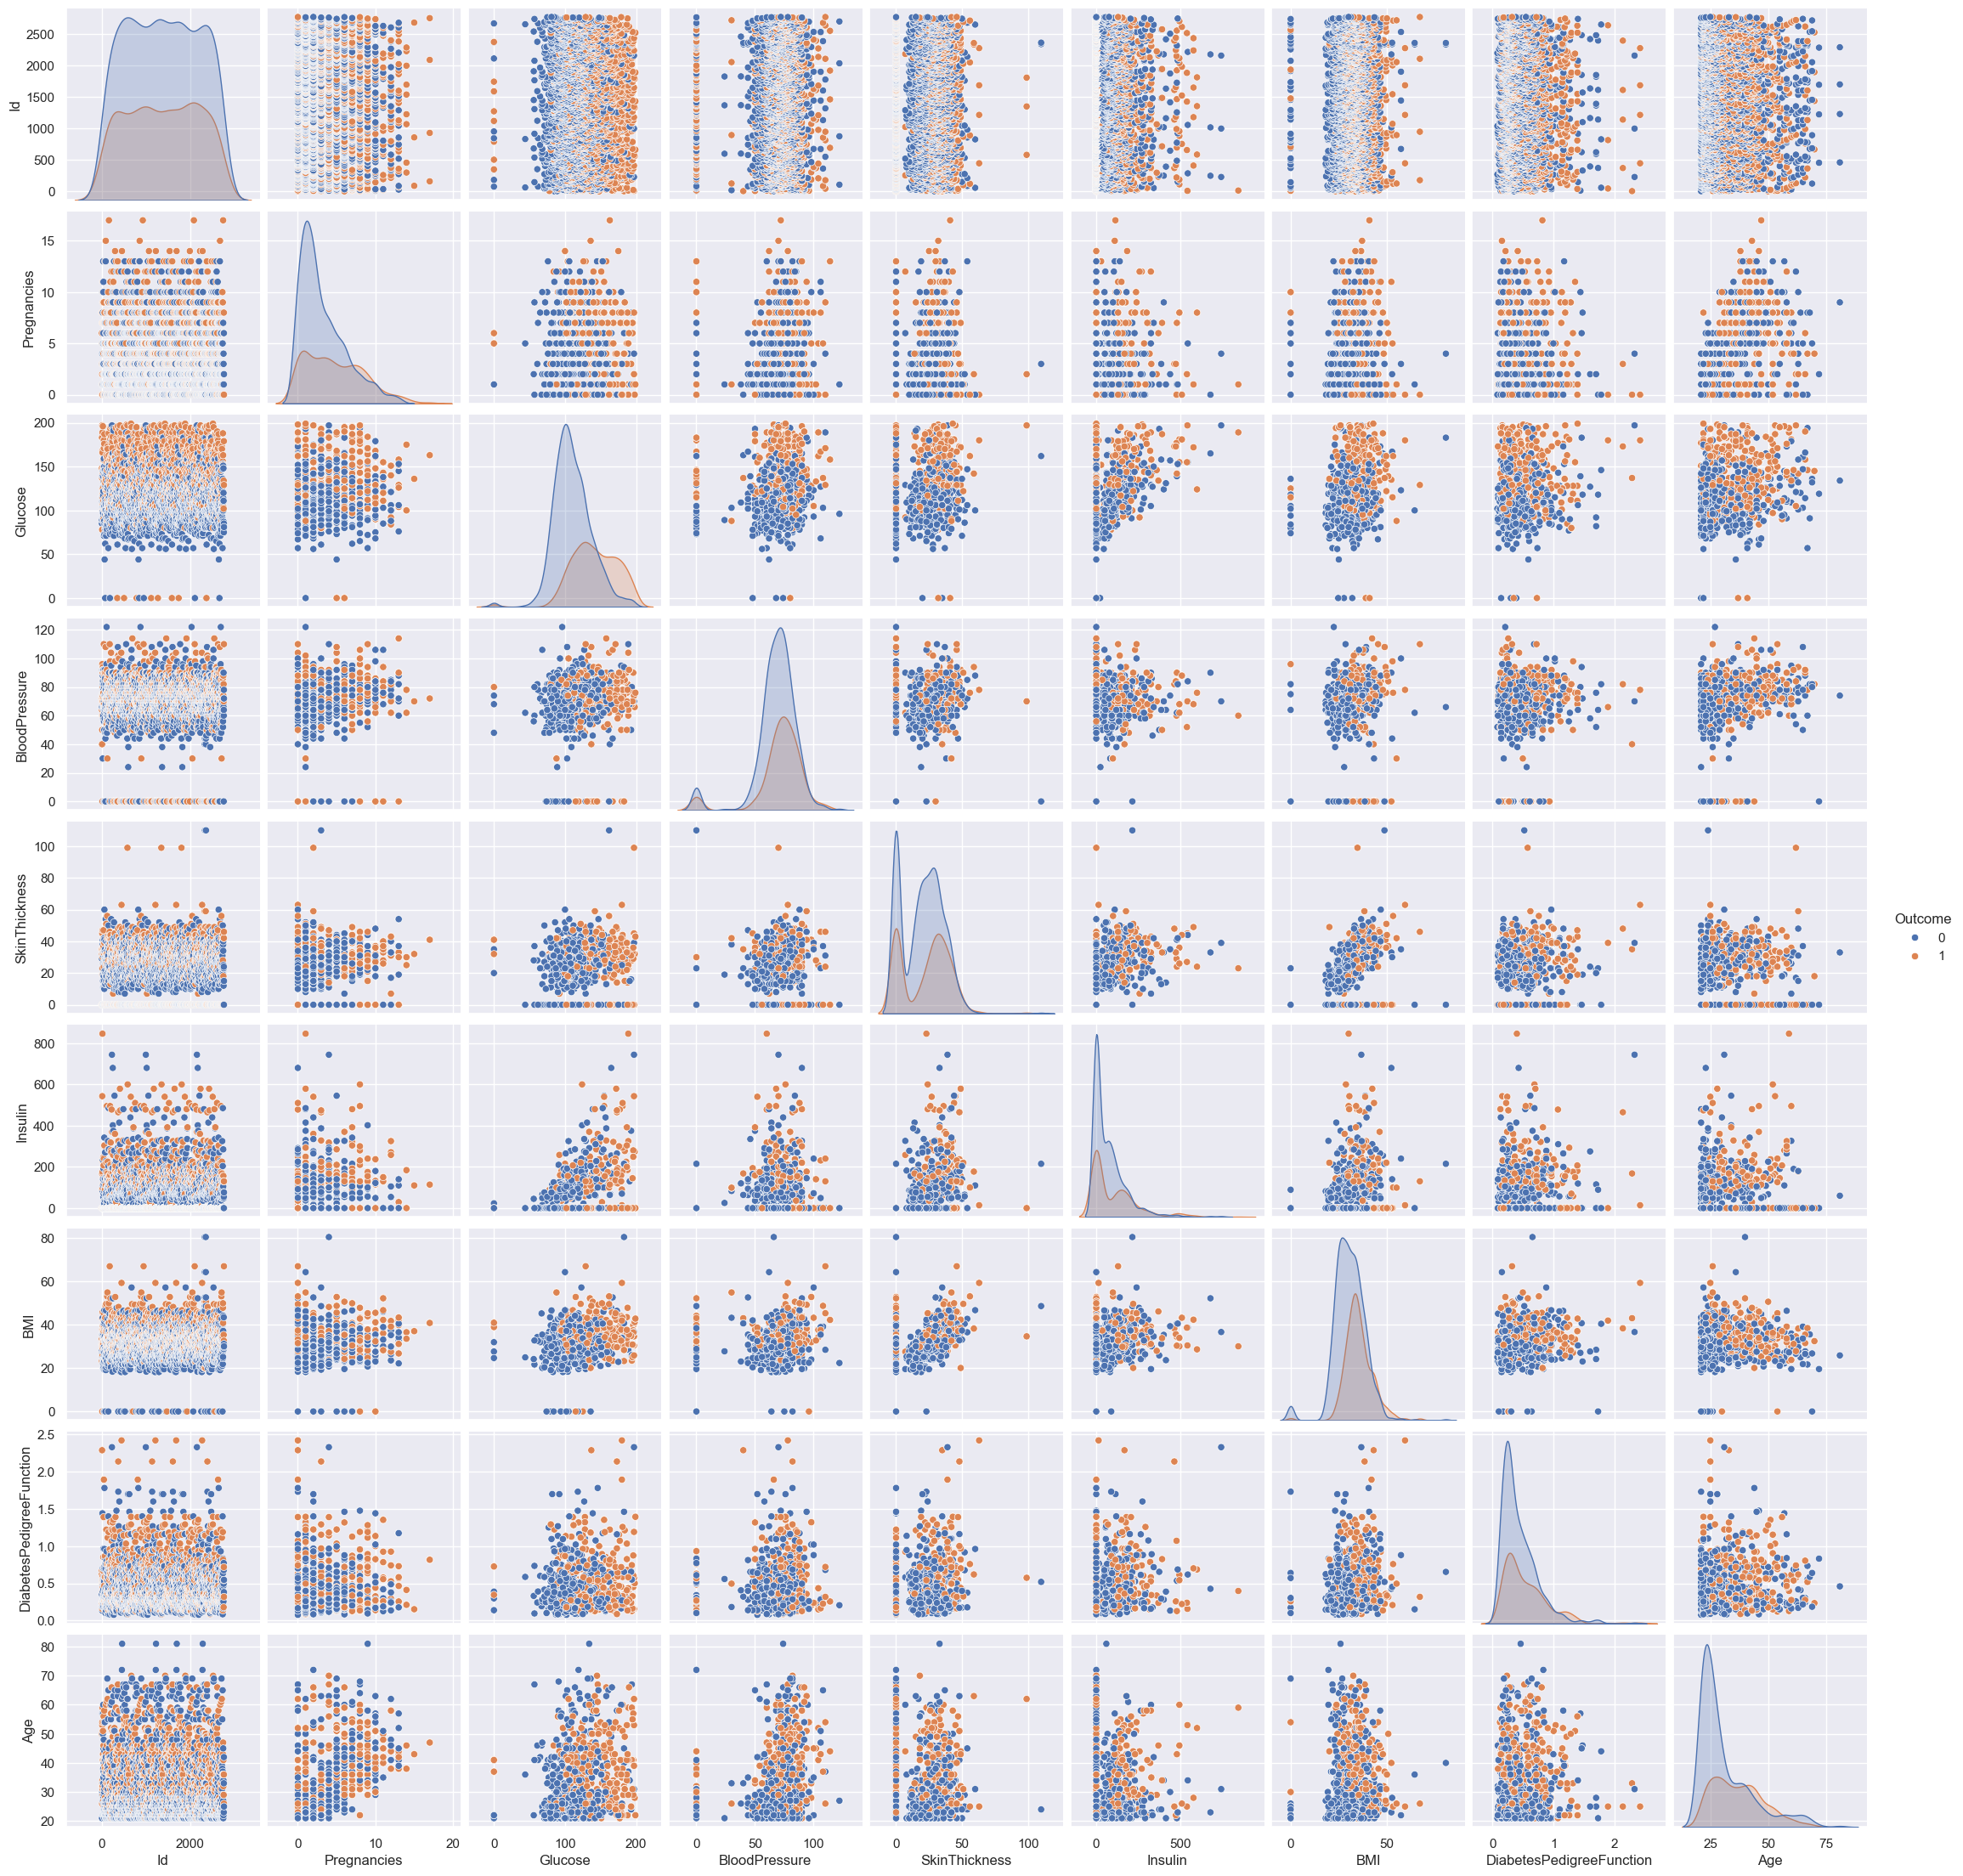

In [20]:
p = sns.pairplot(diabetes_df, hue='Outcome')

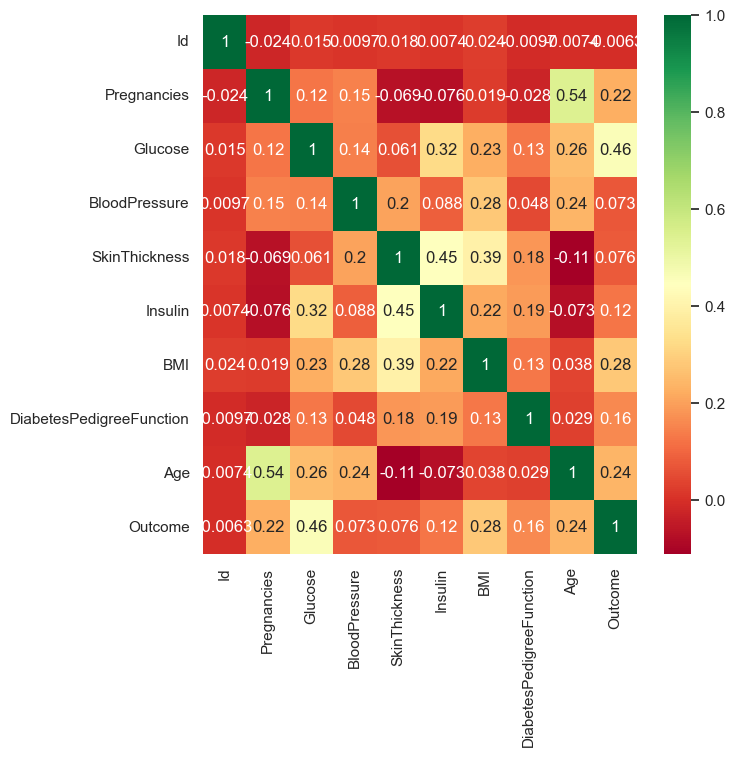

In [21]:
plt.figure(figsize=(7, 7))
p = sns.heatmap(diabetes_df.corr(), annot=True, cmap = 'RdYlGn')

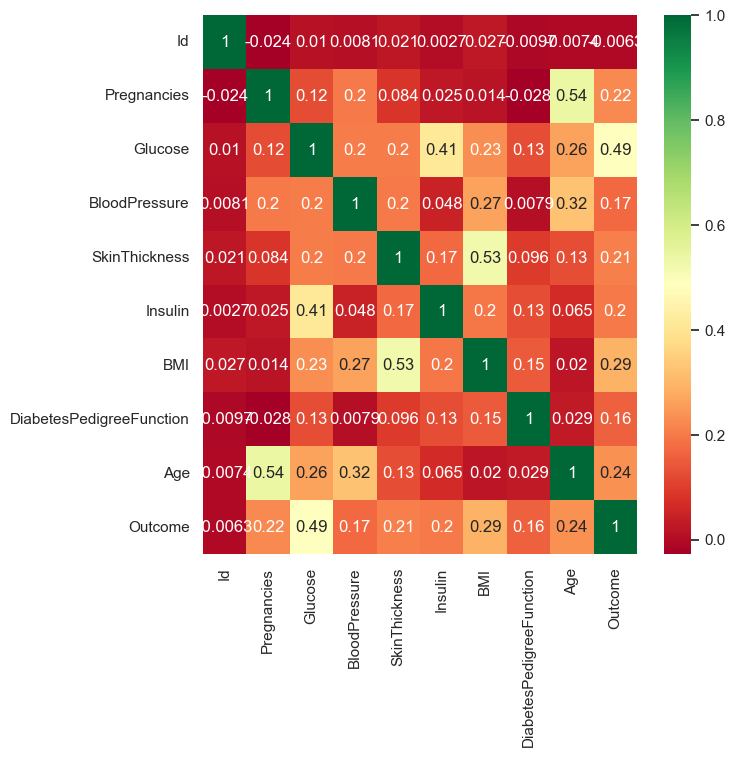

In [22]:
plt.figure(figsize=(7, 7))
p = sns.heatmap(diabetes_df_copy.corr(), annot=True, cmap = 'RdYlGn')

In [23]:
diabetes_df_copy.head()

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6    148.0           72.0           35.0    126.0  33.6   
1   2            1     85.0           66.0           29.0    126.0  26.6   
2   3            8    183.0           64.0           29.0    126.0  23.3   
3   4            1     89.0           66.0           23.0     94.0  28.1   
4   5            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [24]:
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(['Outcome'], axis=1)), columns = ['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

Id  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0 -1.731425     0.679232  0.856020      -0.033713       0.641606 -0.177015   
1 -1.730174    -0.825341 -1.209862      -0.534293      -0.022803 -0.177015   
2 -1.728922     1.281062  2.003733      -0.701153      -0.022803 -0.177015   
3 -1.727671    -0.825341 -1.078694      -0.534293      -0.687212 -0.563148   
4 -1.726419    -1.126256  0.495311      -2.703474       0.641606  0.329784   

        BMI  DiabetesPedigreeFunction       Age  
0  0.141662                  0.478509  1.432495  
1 -0.843952                 -0.369130 -0.181079  
2 -1.308598                  0.616712 -0.096154  
3 -0.632749                 -0.934224 -1.030329  
4  1.479279                  5.579704 -0.011229

In [25]:
y = diabetes_df_copy['Outcome']

In [26]:
y

0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

In [30]:
test_scores = []
train_scores = []

for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))
    

In [31]:
train_scores

[1.0,
 0.9387533875338754,
 0.9414634146341463,
 0.8975609756097561,
 0.8997289972899729,
 0.8699186991869918,
 0.865040650406504,
 0.848780487804878,
 0.8395663956639566,
 0.8368563685636856,
 0.8276422764227642,
 0.8254742547425474,
 0.8303523035230352,
 0.8195121951219512]

In [32]:
test_scores

[0.8938244853737811,
 0.8439869989165764,
 0.8374864572047671,
 0.8299024918743229,
 0.8179848320693391,
 0.8039003250270856,
 0.8017334777898159,
 0.7941495124593716,
 0.7930660888407367,
 0.781148429035753,
 0.7865655471289275,
 0.7822318526543879,
 0.789815817984832,
 0.7822318526543879]

In [35]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100, list(map(lambda x : x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [36]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} %'.format(max_test_score*100, list(map(lambda x : x+1, test_scores_ind))))

Max test score 89.38244853737811 %


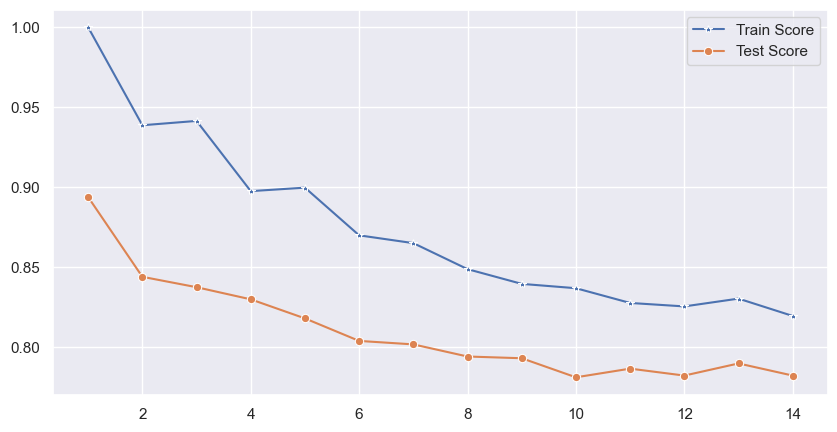

In [40]:
plt.figure(figsize=(10, 5))
p = sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score') 

In [42]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
knn.score(x_train, y_train)

0.8276422764227642

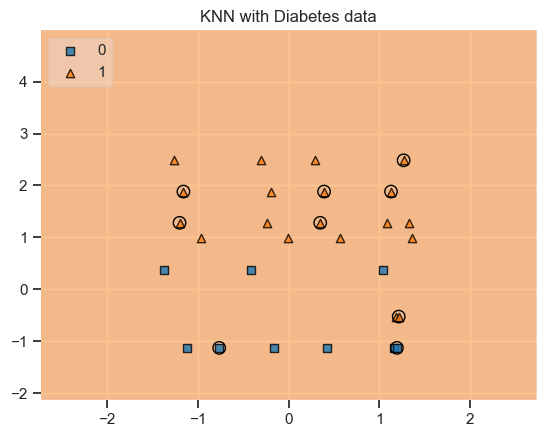

In [44]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value, 8: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width, 8: width},
                      X_highlight=x_test.values)
plt.title('KNN with Diabetes data')
plt.show()

Text(0.5, 20.049999999999997, 'Predicted label')

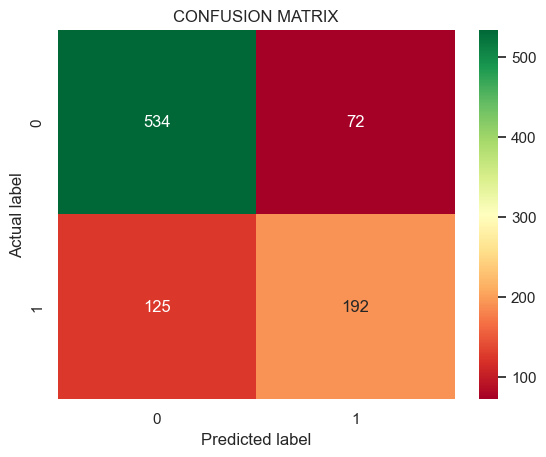

In [45]:
y_pred = knn.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap = 'RdYlGn', fmt='g')
plt.title('CONFUSION MATRIX')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       606
           1       0.73      0.61      0.66       317

    accuracy                           0.79       923
   macro avg       0.77      0.74      0.75       923
weighted avg       0.78      0.79      0.78       923



In [ ]:
!pip freeze > requirements.txt
